In [1]:
%matplotlib inline

# General packages for system, time, etc
import os, time, csv, sys
import datetime
from datetime import date
import glob

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az

# parallel processing related
from p_tqdm import p_map
from functools import partial

#from HDDMarviz import HDDMarviz
#from InferenceDataFromHDDM import InferenceDataFromHDDM
#from plot_ppc_by_cond import plot_ppc_by_cond

/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
data = pd.read_csv('/home/jovyan/hddm_data.csv')
#flip_errors to give response value to 0 as left and 1 as right
data = hddm.utils.flip_errors(data)

In [3]:
def ms1(id, data=None, samples=None, burn=None, save_name="simple_model"): 
   

    """This function instantiate model object passing it our data and tailoring an 
    individual hierarchical DDM around our dataset.It finds a good starting point
    which helps with the convergence.""" 
    
    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m =  hddm.HDDM(data)
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [4]:
#pmap is to run multiple chains at once 
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1500    
thin = 1
chains = 2

model_1 = p_map(partial(ms1, data=data, samples=samples, burn=burn),
                 range(chains))

  0%|          | 0/2 [00:00<?, ?it/s]

running model0
running model1


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 2 of 5000 complete in 0.9 sec[                  0%                  ] 2 of 5000 complete in 1.2 sec[                  0%                  ] 3 of 5000 complete in 2.4 sec[                  0%                  ] 3 of 5000 complete in 2.9 sec[                  0%                  ] 4 of 5000 complete in 4.2 sec[                  0%                  ] 4 of 5000 complete in 4.6 sec[                  0%                  ] 5 of 5000 complete in 5.7 sec[                  0%                  ] 5 of 5000 complete in 5.9 sec[                  0%                  ] 6 of 5000 complete in 7.2 sec[                  0%                  ] 6 of 5000 complete in 7.4 sec[                  0%                  ] 7 of 5000 complete in 8.3 sec[                  0%                  ] 7 of 5000 complete in 8.4 sec[                  0%                  ] 8 of 5000 complete in 9.6 sec[                  0%                  ] 8 of 5000 complete in 9.7 sec[                  

In [16]:
stats = model_1[0].gen_stats()
display(stats.loc[['a']])
display(stats.loc[['a_std']])
display(stats.loc[['v']])
display(stats.loc[['v_std']])
display(stats.loc[['t']])
display(stats.loc[['t_std']])

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.32442,0.071845,2.188493,2.274787,2.323498,2.371462,2.46895,0.001297


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a_std,0.664345,0.055965,0.566745,0.624745,0.661005,0.698861,0.78546,0.001206


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v,-0.006225,0.01269,-0.030209,-0.014973,-0.006584,0.002376,0.019068,0.000364


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_std,0.081437,0.015205,0.051078,0.0717,0.081594,0.091529,0.111937,0.00085


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t,0.708921,0.035509,0.64019,0.685111,0.707945,0.731497,0.780231,0.000874


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t_std,0.332544,0.030096,0.279708,0.311965,0.330136,0.350907,0.398076,0.000788


In [17]:
stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.32442,0.071845,2.188493,2.274787,2.323498,2.371462,2.46895,0.001297
a_std,0.664345,0.055965,0.566745,0.624745,0.661005,0.698861,0.78546,0.001206
a_subj.102,2.654839,0.149068,2.370127,2.555695,2.648349,2.75087,2.966253,0.003463
a_subj.103,1.790705,0.092853,1.615329,1.727387,1.787281,1.850243,1.988978,0.002474
a_subj.104,2.865771,0.172914,2.547367,2.743703,2.859259,2.975453,3.230758,0.004891
...,...,...,...,...,...,...,...,...
t_subj.276,1.378164,0.195344,0.870298,1.287036,1.416525,1.506272,1.664712,0.005846
t_subj.277,0.432649,0.025241,0.378346,0.416841,0.434551,0.450167,0.477467,0.000551
t_subj.278,0.70567,0.029677,0.642316,0.686355,0.707747,0.726974,0.756381,0.000727
t_subj.279,1.030786,0.034398,0.955627,1.009636,1.033919,1.055075,1.092045,0.000779


Plotting a
Plotting v
Plotting t


Text(0.0, 1.0, 'Posterior of HDDM Parameters')

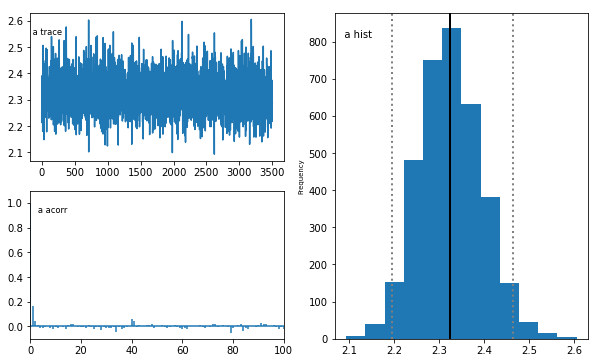

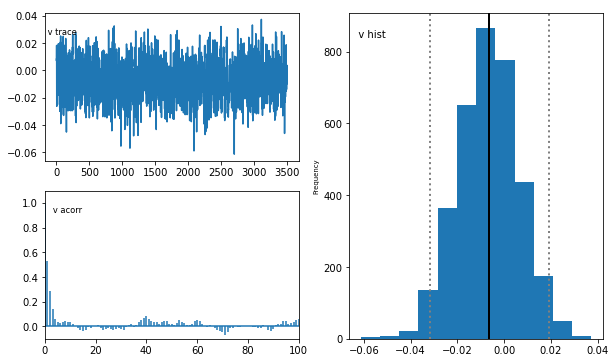

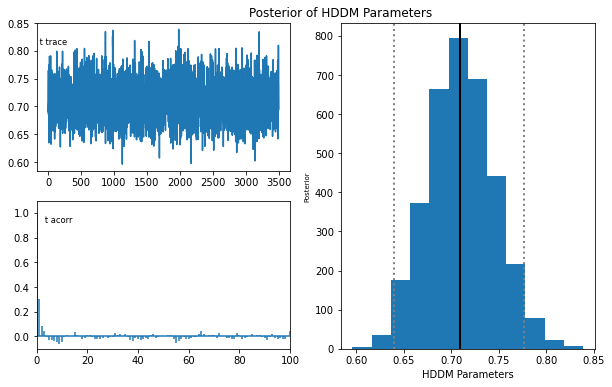

In [20]:
model_1[1].plot_posteriors(['a', 't', 'v'])

plt.xlabel('HDDM Parameters')
plt.ylabel('Posterior')
plt.title('Posterior of HDDM Parameters')

Text(0.5, 1.0, 'Posterior Predictive Plot')

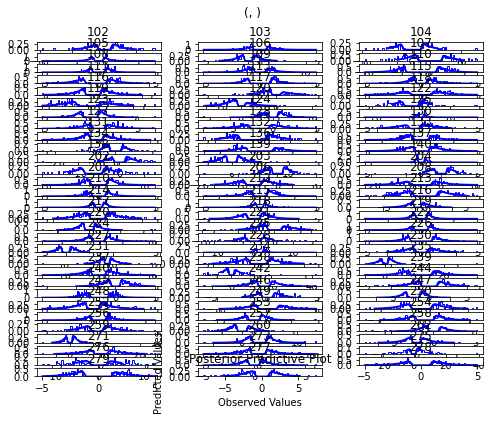

In [21]:
model_1[0].plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Posterior Predictive Plot')

In [24]:
hddm.analyze.gelman_rubin(model_1)

{'a': 0.9998973802549922,
 'a_std': 1.00049830153922,
 'a_subj.102': 1.0001273676816895,
 'a_subj.103': 1.002784410003164,
 'a_subj.104': 0.9998680439437255,
 'a_subj.105': 0.9998758181297601,
 'a_subj.106': 1.0005071368702712,
 'a_subj.107': 0.9998945414129277,
 'a_subj.108': 1.0000801113287272,
 'a_subj.109': 0.9999244340214792,
 'a_subj.110': 1.0004600711765255,
 'a_subj.111': 1.0005968990725354,
 'a_subj.113': 1.0004856632795376,
 'a_subj.115': 0.9999227756189846,
 'a_subj.116': 0.9999210691113138,
 'a_subj.117': 0.9998736867894618,
 'a_subj.118': 1.0001575201156114,
 'a_subj.119': 1.0003399595176872,
 'a_subj.120': 1.000286483024532,
 'a_subj.122': 0.9998890145340114,
 'a_subj.123': 0.9998897581891236,
 'a_subj.124': 1.0018251757632444,
 'a_subj.125': 1.0005126606323738,
 'a_subj.127': 1.0000001052896887,
 'a_subj.128': 1.0002085372420215,
 'a_subj.130': 1.0016943826761138,
 'a_subj.131': 1.0017256184364347,
 'a_subj.132': 1.0004814241266322,
 'a_subj.133': 1.000417378524786,
 'a_

Text(0.5, 1.0, 'Combined Posterior Predictive Plot')

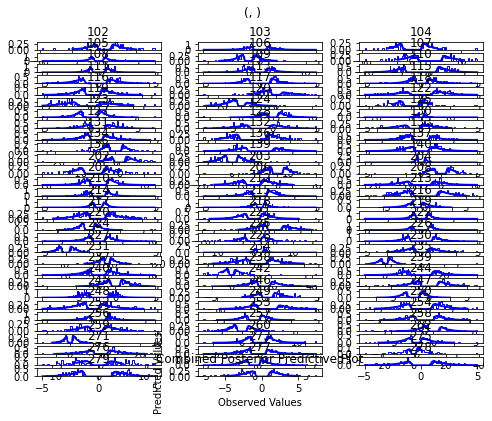

In [25]:
m_comb = kabuki.utils.concat_models(model_1) # combine four chains together
m_comb.plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Combined Posterior Predictive Plot')

In [26]:
print("Simple model DIC: %f" % model_1[0].dic)

Simple model DIC: 38661.161124


In [27]:
print("Simple model DIC: %f" % model_1[1].dic)

Simple model DIC: 38660.709870


Text(0.5, 1.0, 'Posterior Nodes Plot')

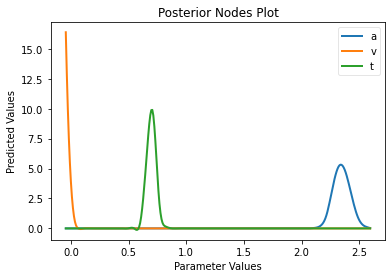

In [31]:
hddm.analyze.plot_posterior_nodes(model_1[0].nodes_db.loc[['a', 'v', 't'], 'node'])

plt.xlabel('Parameter Values')
plt.ylabel('Predicted Values')
plt.title('Posterior Nodes Plot')

Text(0.5, 1.0, 'Posterior Nodes Plot')

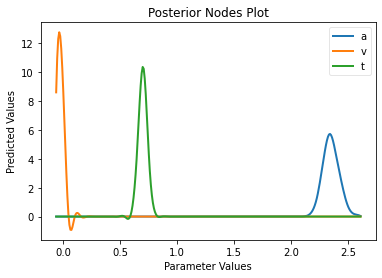

In [32]:
hddm.analyze.plot_posterior_nodes(model_1[1].nodes_db.loc[['a', 'v', 't'], 'node'])

plt.xlabel('Parameter Values')
plt.ylabel('Predicted Values')
plt.title('Posterior Nodes Plot')

Text(0.5, 1.0, 'Posterior of non-decision time group means')

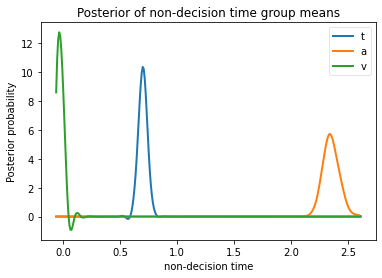

In [34]:
t, a, v = model_1[1].nodes_db.node[['t','a', 'v']]
hddm.analyze.plot_posterior_nodes([ t, a, v])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-decision time group means')